In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [6]:
from imblearn.metrics import classification_report_imbalanced

In [7]:
raw_data = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
raw_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df = raw_data.copy()

## Data Exploration

In [11]:
def dist_plots(col):
    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    sns.distplot(df[col])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.tight_layout()
    
def mean_last_five_first_five(col):
    print('Mean value: ', df[col].mean(), '\n')
    print(df[col].sort_values(ascending=False)[:5])
    print(df[col].sort_values()[:5])
    
def count_plots(col):
    plt.figure(figsize=(12, 4))
    sns.countplot(df[col])
    plt.tight_layout()
    
    print(df[col].value_counts())

## Univariate Analysis

### Bank Client Data

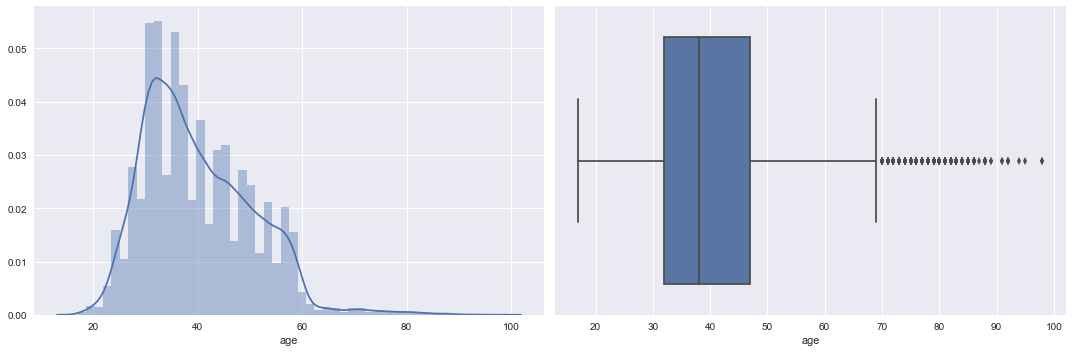

In [12]:
dist_plots('age')

In [13]:
mean_last_five_first_five('age')

Mean value:  40.02406040594348 

38452    98
38455    98
27826    95
38921    94
40450    92
Name: age, dtype: int64
38274    17
37579    17
37539    17
37140    17
37558    17
Name: age, dtype: int64


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


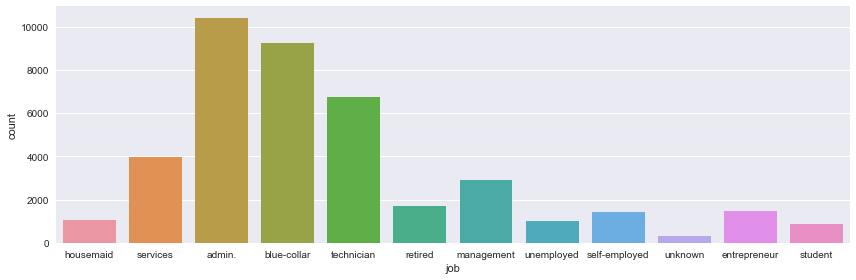

In [14]:
# type of job
count_plots('job')

In [15]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


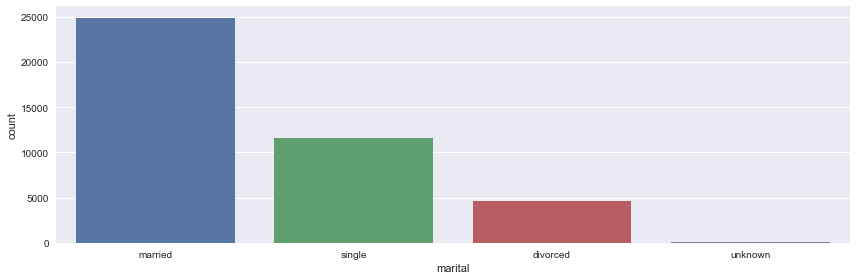

In [16]:
# marital status
count_plots('marital')

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


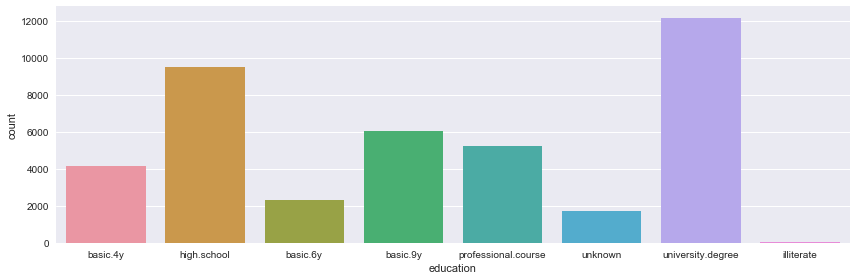

In [17]:
# education level
count_plots('education')

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


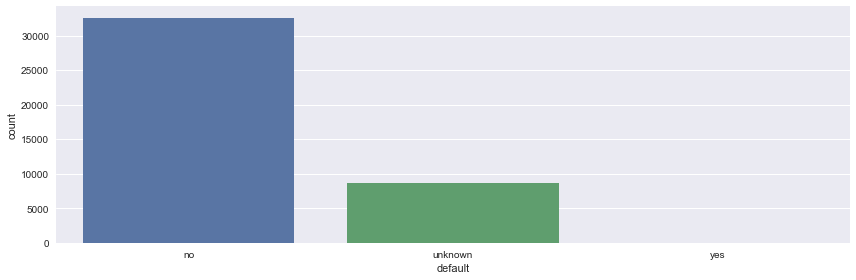

In [18]:
# has credit in default
count_plots('default')

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


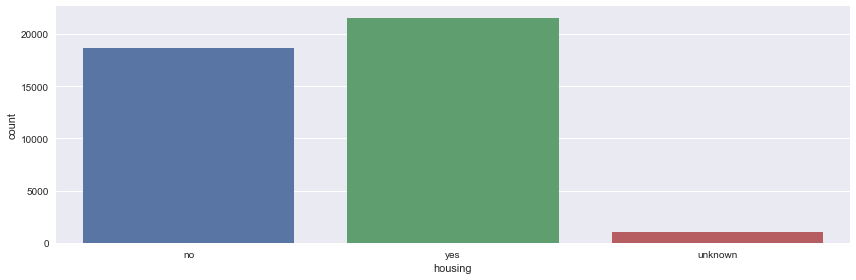

In [19]:
# has housing loan?
count_plots('housing')

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


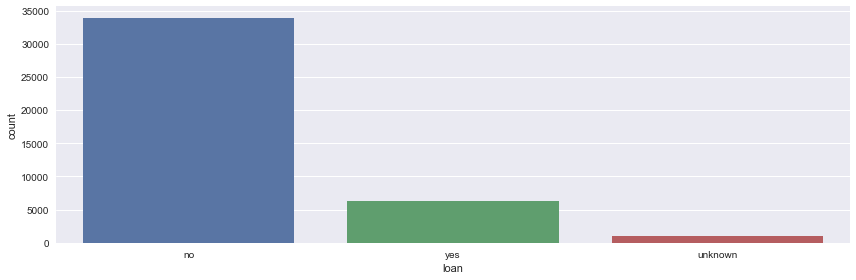

In [20]:
# has personal loan?
count_plots('loan')

### Related with Last Contact of Current Campaign

cellular     26144
telephone    15044
Name: contact, dtype: int64


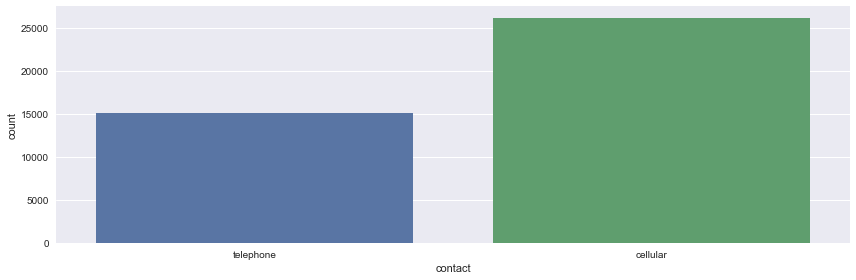

In [21]:
# contact communication type
count_plots('contact')

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


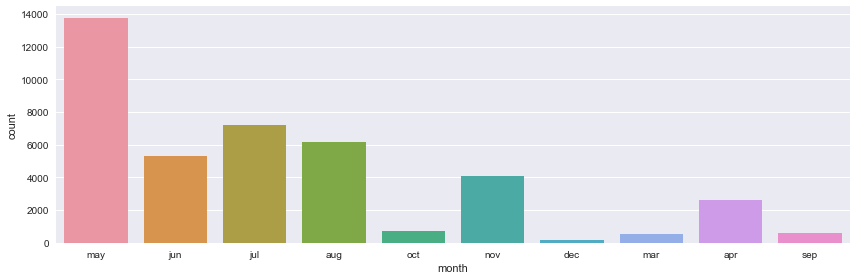

In [22]:
count_plots('month')

In [23]:
df['month'].value_counts()
# no values for january or february

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


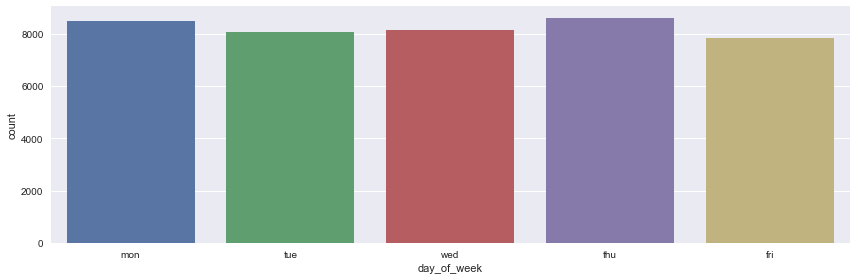

In [24]:
count_plots('day_of_week')

In [25]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

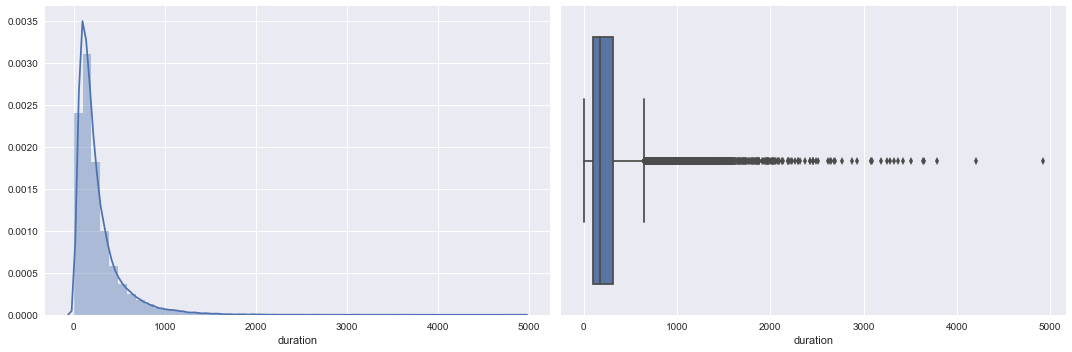

In [26]:
# duration of contact in seconds
dist_plots('duration')

In [27]:
mean_last_five_first_five('duration')

Mean value:  258.2850101971448 

24091    4918
22192    4199
40537    3785
13820    3643
7727     3631
Name: duration, dtype: int64
33015    0
23031    0
28063    0
6251     0
28239    1
Name: duration, dtype: int64


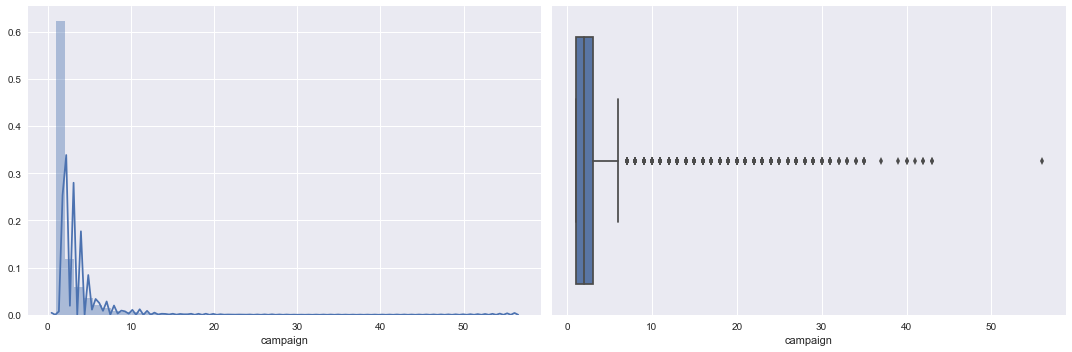

In [28]:
# number of contacts performed during this campaign and for this client
dist_plots('campaign')

In [29]:
mean_last_five_first_five('campaign')

Mean value:  2.567592502670681 

4107     56
18728    43
13447    43
5304     42
4168     42
Name: campaign, dtype: int64
0        1
30141    1
30142    1
30143    1
30144    1
Name: campaign, dtype: int64


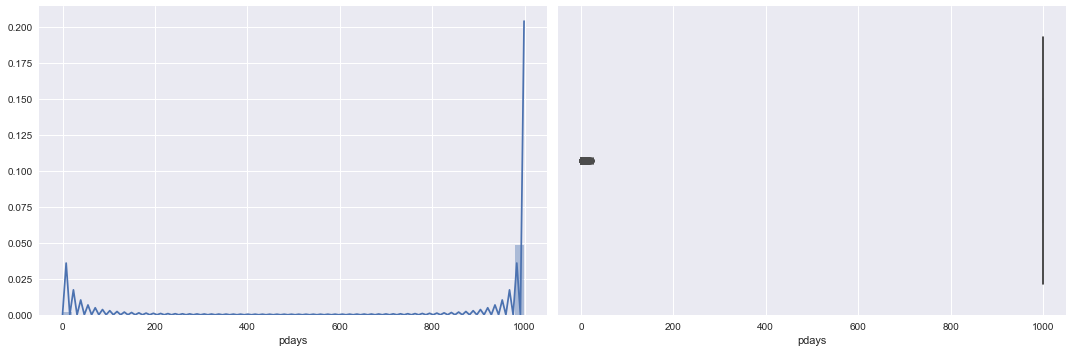

In [30]:
# number of days that passed by after the client was last contacted from
# a previous campaign
dist_plots('pdays')

In [31]:
# note: 999 means client was not previously contacted
mean_last_five_first_five('pdays')

Mean value:  962.4754540157328 

41187    999
13675    999
13733    999
13732    999
13731    999
Name: pdays, dtype: int64
40534    0
40376    0
30417    0
30314    0
40382    0
Name: pdays, dtype: int64


In [32]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [33]:
# 96 percent of clients were not previously contacted
(df['pdays'] == 999).sum() / (df['pdays'].count())

0.96321744197339032

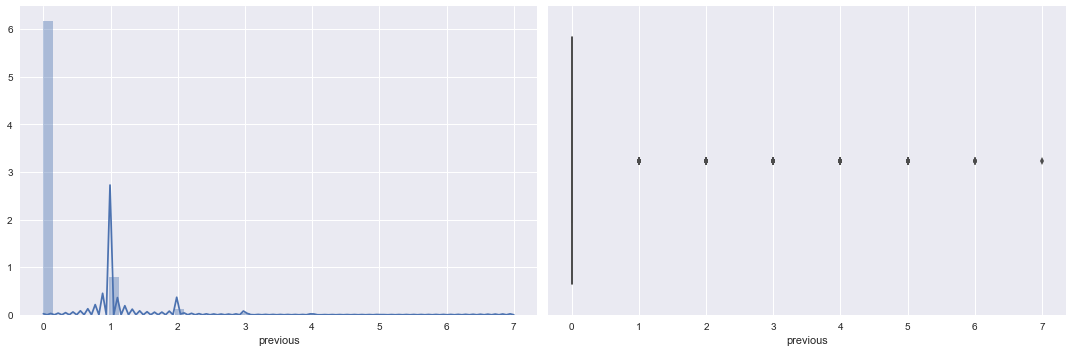

In [34]:
# number of contacts performed before this campaign and for this client
dist_plots('previous')

In [35]:
mean_last_five_first_five('previous')

Mean value:  0.17296299893172767 

41081    7
41090    6
40395    6
40436    6
40421    6
Name: previous, dtype: int64
0        0
23717    0
23716    0
23715    0
23714    0
Name: previous, dtype: int64


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


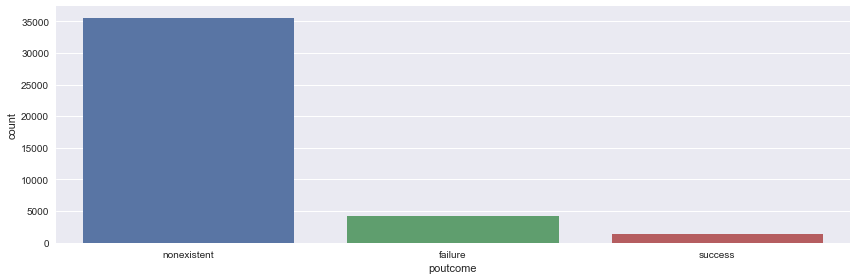

In [36]:
# outcome of the previous marketing campaign
count_plots('poutcome')

### Social and Economic context attributes

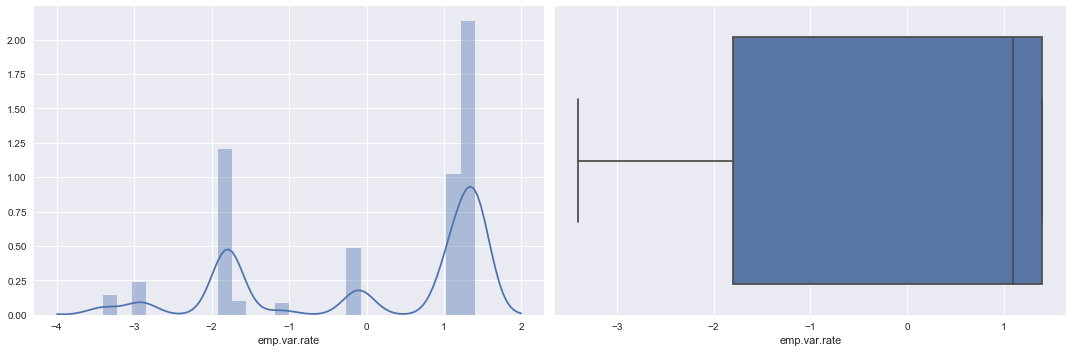

In [37]:
# employment variation rate - quarterly indicator
dist_plots('emp.var.rate')

In [38]:
mean_last_five_first_five('emp.var.rate')

Mean value:  0.0818855006319146 

20593    1.4
15993    1.4
16002    1.4
16001    1.4
16000    1.4
Name: emp.var.rate, dtype: float64
38490   -3.4
38251   -3.4
38250   -3.4
38249   -3.4
38248   -3.4
Name: emp.var.rate, dtype: float64


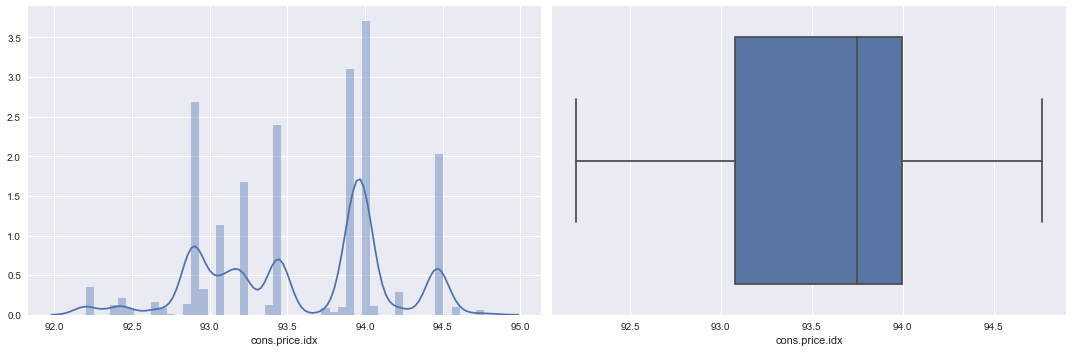

In [39]:
# consumer price index - monthly indicator
# an index of the variation in prices paid by typical consumers 
# for retail goods and other items
dist_plots('cons.price.idx')

In [40]:
mean_last_five_first_five('cons.price.idx')

Mean value:  93.57566436831263 

41187    94.767
41122    94.767
41092    94.767
41093    94.767
41094    94.767
Name: cons.price.idx, dtype: float64
37681    92.201
37624    92.201
37625    92.201
37626    92.201
37627    92.201
Name: cons.price.idx, dtype: float64


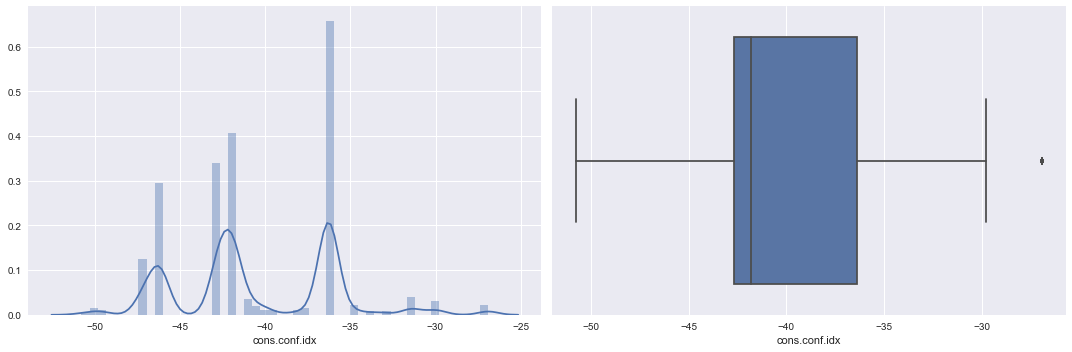

In [41]:
# consumer confidence index - monthly indicator
# the degree of optimism on the state of the economy that consumers 
# are expressing through their activities of savings and spending
dist_plots('cons.conf.idx')

In [42]:
mean_last_five_first_five('cons.conf.idx')

Mean value:  -40.50260027191399 

38580   -26.9
38377   -26.9
38295   -26.9
38296   -26.9
38297   -26.9
Name: cons.conf.idx, dtype: float64
41187   -50.8
41093   -50.8
41094   -50.8
41095   -50.8
41096   -50.8
Name: cons.conf.idx, dtype: float64


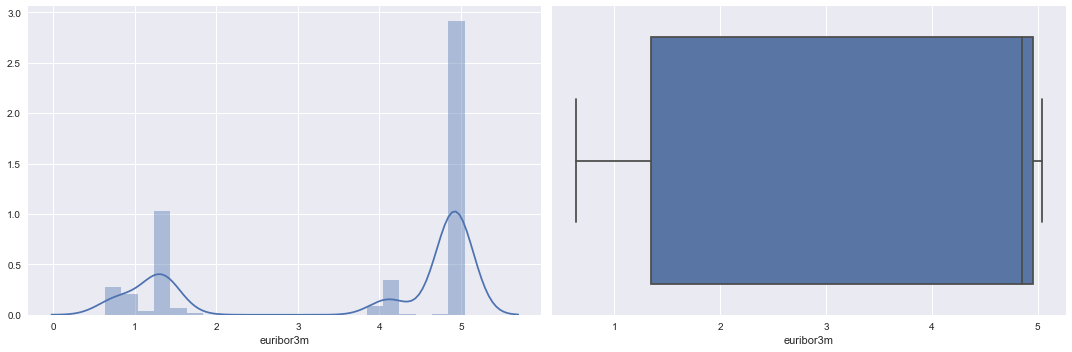

In [43]:
# Euribor 3 month rate
# based on the interest rates at which a a panel of European banks borrow funds 
# from one another.
dist_plots('euribor3m')

In [44]:
mean_last_five_first_five('euribor3m')

Mean value:  3.621290812858068 

23997    5.045
23998    5.045
23999    5.045
24000    5.045
24001    5.045
Name: euribor3m, dtype: float64
39388    0.634
39389    0.634
39390    0.634
39391    0.634
39392    0.634
Name: euribor3m, dtype: float64


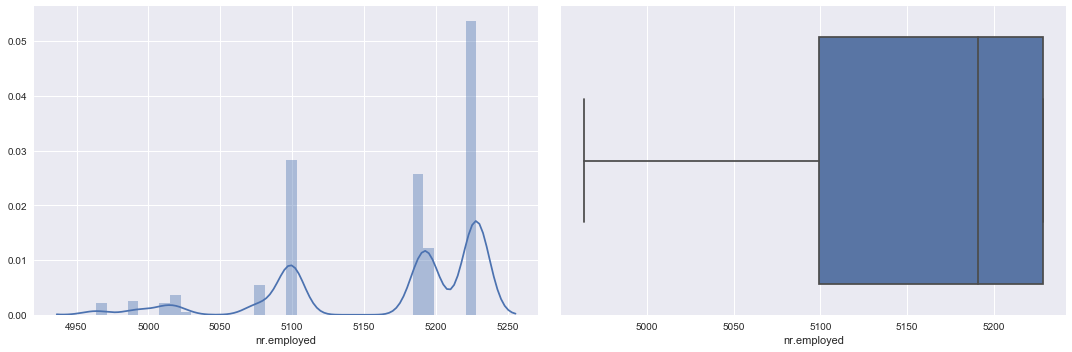

In [45]:
# number of employees
dist_plots('nr.employed')

In [46]:
mean_last_five_first_five('nr.employed')

Mean value:  5167.035910941844 

20593    5228.1
21510    5228.1
21501    5228.1
21502    5228.1
21503    5228.1
Name: nr.employed, dtype: float64
41187    4963.6
40766    4963.6
40765    4963.6
40764    4963.6
40763    4963.6
Name: nr.employed, dtype: float64


### Outcome Variable

no     36548
yes     4640
Name: y, dtype: int64


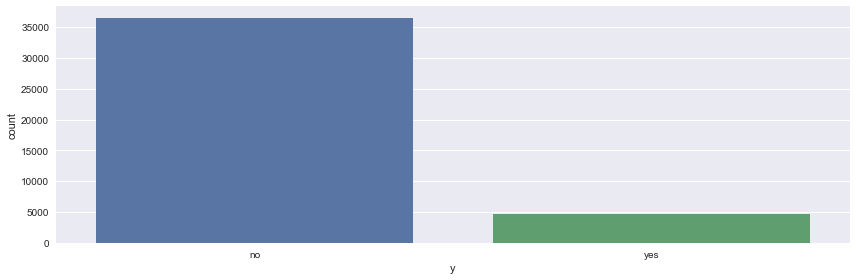

In [47]:
# does the client subscribe for a term deposit?
count_plots('y')

In [48]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Bivariate Analysis

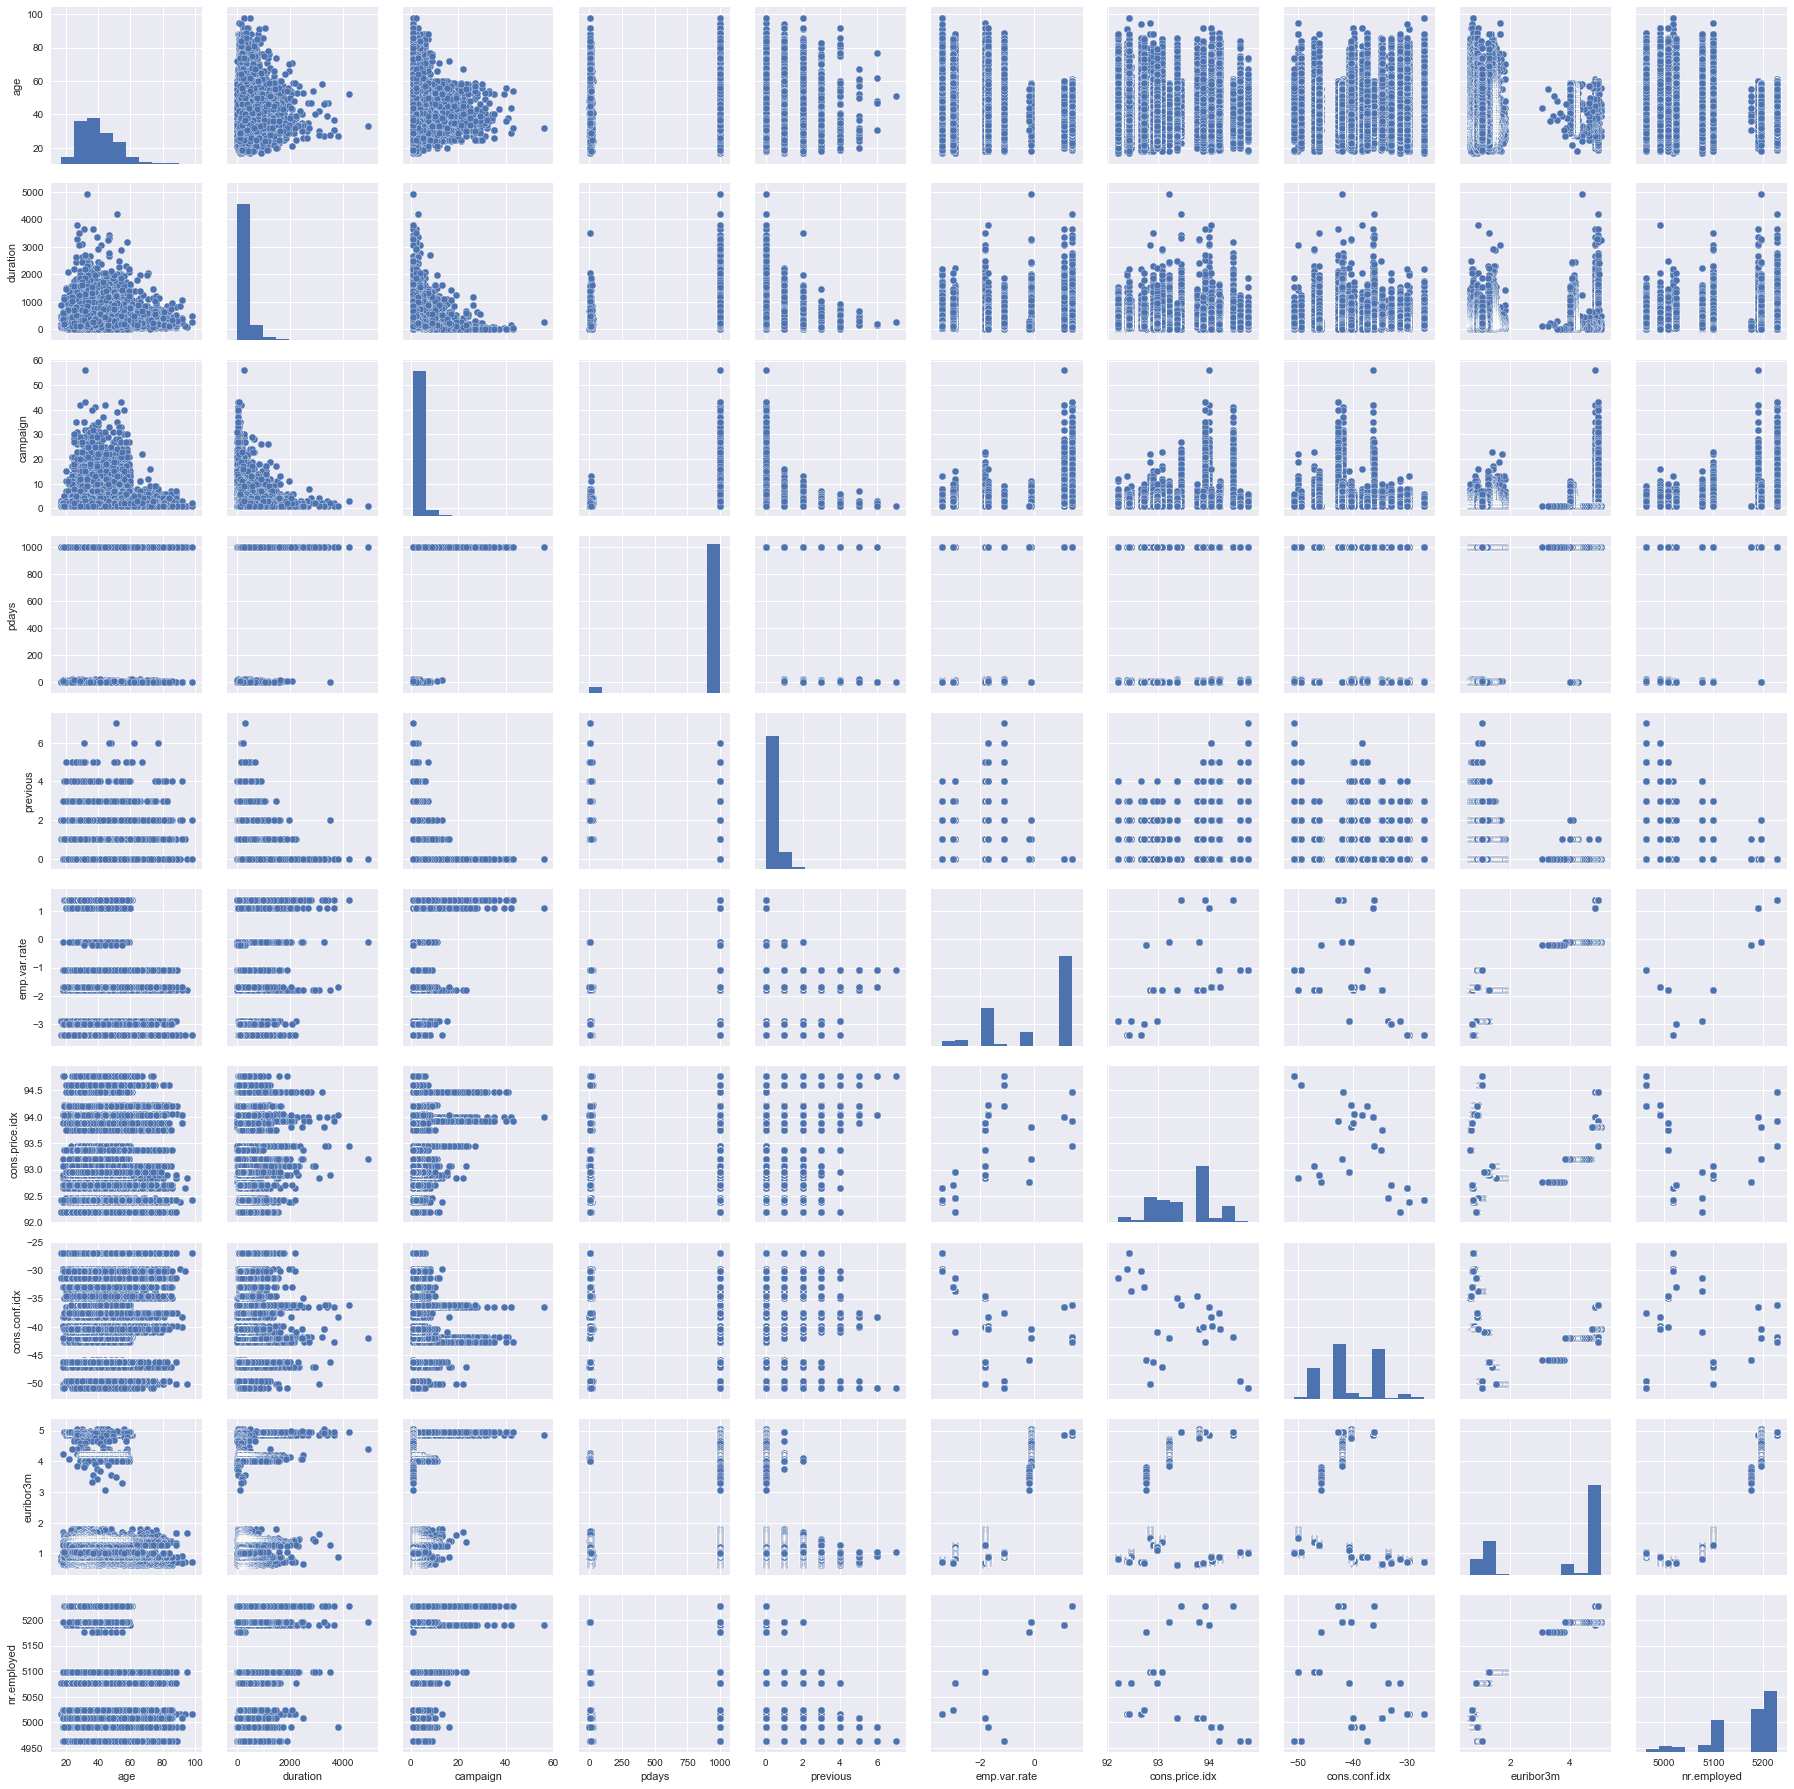

In [49]:
sns.pairplot(df)

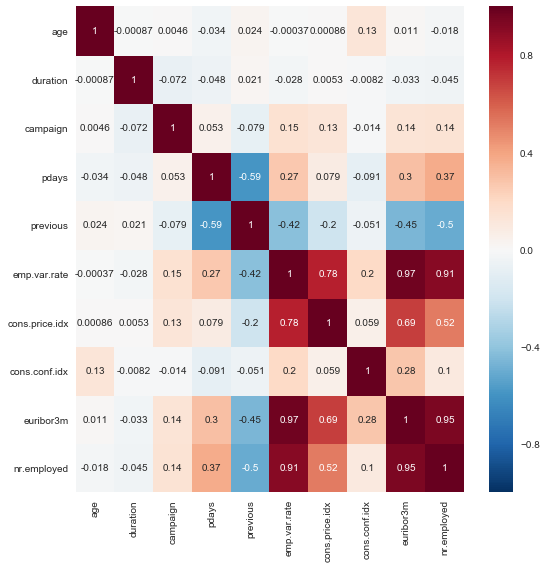

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

## Feature Selection

In [51]:
# convert outcome variable to numeric
df['y'] = pd.get_dummies(df['y'], drop_first=True)

In [52]:
def month_converter(month):
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
              'oct', 'nov', 'dec']
    return months.index(month) + 1

In [53]:
def day_converter(day):
    days = ['mon', 'tue', 'wed', 'thu', 'fri']
    return days.index(day) + 1

In [54]:
df['month'] = df['month'].map(month_converter)

In [55]:
df['day_of_week'] = df['day_of_week'].map(day_converter)

In [56]:
df['previously_contacted'] = np.where(df['pdays'] != 999, 1, 0)
df.drop('pdays', axis=1, inplace=True)

In [57]:
le = LabelEncoder()

In [58]:
for item in ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'poutcome']:
    le.fit(df[item])
    df[item] = le.transform(df[item])

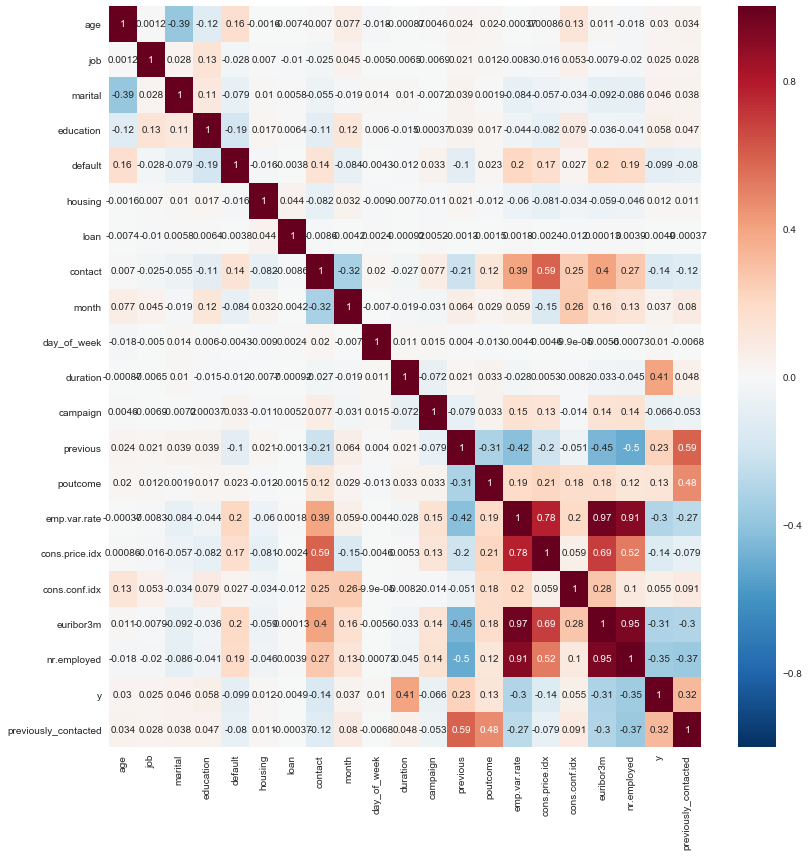

In [59]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

## Model Creation

In [60]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
abc = AdaBoostClassifier()

In [61]:
models = [(rfc, 'Random Forest'), (dtc, 'Decision Tree'), (lr, 'Logistic Regression'),
          (abc, 'Ada Boost')]

In [62]:
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Ada Boost']

In [63]:
X = df.drop(['y', 'emp.var.rate'], axis=1)

In [64]:
y = df.y

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .25,
                                                  random_state=12)

In [66]:
X_train.shape

(30891, 19)

In [67]:
X_test.shape

(10297, 19)

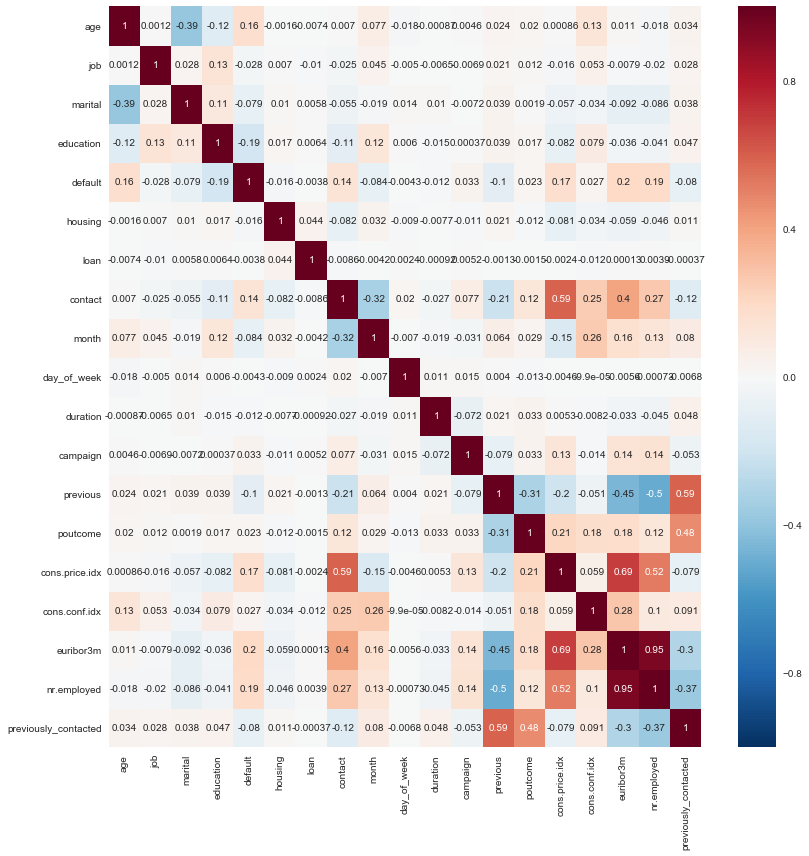

In [68]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), annot=True)
plt.tight_layout()

## Helper Functions

In [70]:
def report_and_matrix(y_test, predictions):
    print(classification_report_imbalanced(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

In [ ]:
aucs = []

In [71]:
def set_aucs():
    aucs = []

In [72]:
def clear_aucs():
    aucs.clear()

In [73]:
def calculateAUC(y_test, predictions):
    fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)
    auc_score = auc(fpr, tpr)
    aucs.append(auc_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    print(auc_score)

In [74]:
def evaluate_sample_method(smpl_method, clf, ratio_n=1.0, random_state_n=12):
    smplr = smpl_method(ratio=ratio_n, random_state=random_state_n)
    x_train_res, y_train_res = smplr.fit_sample(X_train, y_train)

    classifier = clf.fit(x_train_res, y_train_res)

    
    predictions = classifier.predict(X_test)
    
    report_and_matrix(y_test, predictions)

    print('\n')
    
    calculateAUC(y_test, predictions)
    
    print('\n')
    print('\n')

In [75]:
def evaluate_base_method(model):
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    report_and_matrix(y_test, predictions)

    print('\n')
    
    calculateAUC(y_test, predictions)
    
    print('\n')

In [1]:
def evaluate_base_models(model_list):
    for model in model_list:
        print(model[1])
        plt.figure()
        plt.title(model[1])
        evaluate_base_method(model[0])
        print('\n')
        print('\n')

In [77]:
def plot_aucs(models, scores, smpl):
    plt.figure(figsize=(6,6))
    sns.barplot(x=models, y=scores)
    plt.ylim(min(scores) - .03, max(scores) + .03)
    plt.title('AUC scores for' + ' ' + smpl)
    plt.ylabel('AUC')

In [78]:
# initialize the creation of the auc list
set_aucs()

## Evaluate Base Models (no special sampling)

Random Forest
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.97      0.47      0.95      0.78      0.62      9116
          1       0.65      0.47      0.97      0.55      0.78      0.59      1181

avg / total       0.90      0.91      0.53      0.90      0.78      0.62     10297

[[8813  303]
 [ 621  560]]


0.720468083027


Decision Tree
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.93      0.54      0.94      0.70      0.51      9116
          1       0.52      0.54      0.93      0.53      0.70      0.46      1181

avg / total       0.89      0.89      0.59      0.89      0.70      0.50     10297

[[8513  603]
 [ 540  641]]


0.73830646974


Logistic Regression
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.97      0.39      0.95      0.79      0.63      9116
          1       0.67  

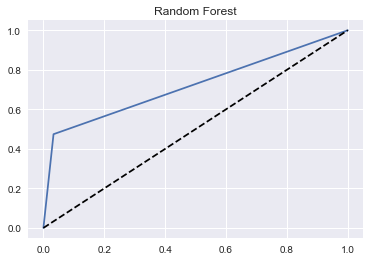

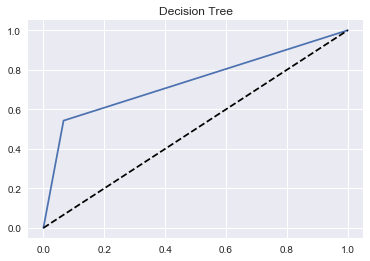

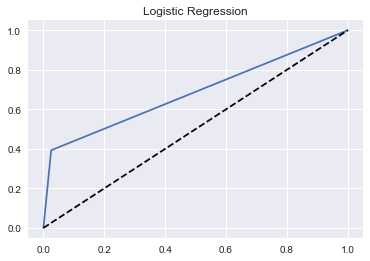

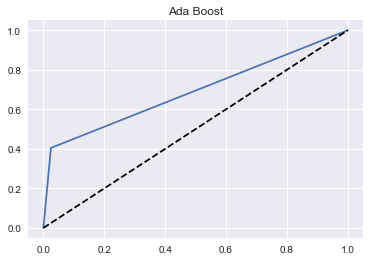

In [79]:
evaluate_base_models(models)

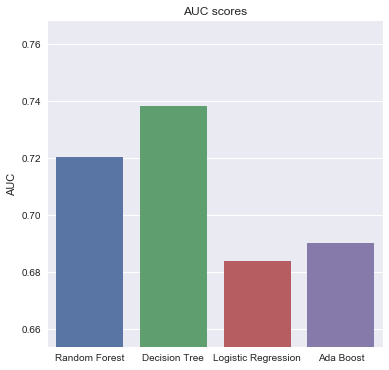

In [80]:
plt.figure(figsize=(6,6))
sns.barplot(x=model_names, y=aucs)
plt.ylim(min(aucs) - .03, max(aucs) + .03)
plt.title('AUC scores')
plt.ylabel('AUC')

In [81]:
clear_aucs()

## SMOTE Sampling

In [82]:
set_aucs()

Random Forest
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.96      0.51      0.95      0.77      0.60      9116
          1       0.63      0.51      0.96      0.56      0.77      0.57      1181

avg / total       0.90      0.91      0.56      0.90      0.77      0.60     10297

[[8754  362]
 [ 577  604]]


0.735860295694


Decision Tree
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.93      0.54      0.94      0.69      0.49      9116
          1       0.50      0.54      0.93      0.52      0.69      0.45      1181

avg / total       0.89      0.89      0.59      0.89      0.69      0.49     10297

[[8485  631]
 [ 539  642]]


0.737194078467


Logistic Regression
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.86      0.85      0.91      0.65      0.45      9116
          1       0.43 

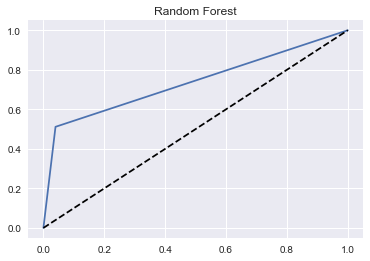

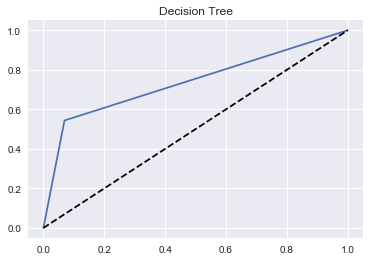

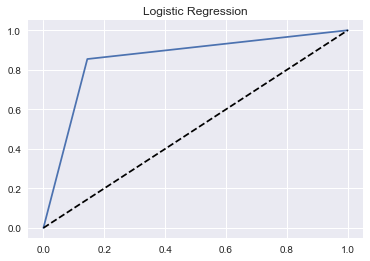

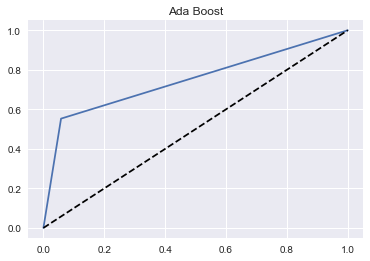

In [83]:
for model in models:
    print(model[1])
    plt.figure()
    plt.title(model[1])
    evaluate_sample_method(SMOTE, model[0])

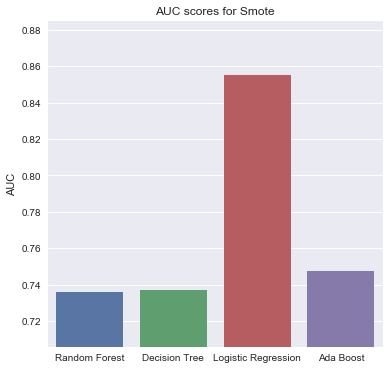

In [84]:
plot_aucs(model_names, aucs, 'Smote')

In [85]:
clear_aucs()

## Random over-sampling

In [86]:
set_aucs()

Random Forest
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.95      0.54      0.95      0.76      0.59      9116
          1       0.61      0.54      0.95      0.57      0.76      0.55      1181

avg / total       0.90      0.91      0.59      0.90      0.76      0.59     10297

[[8699  417]
 [ 540  641]]


0.748508312654


Decision Tree
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.94      0.51      0.94      0.71      0.52      9116
          1       0.53      0.51      0.94      0.52      0.71      0.48      1181

avg / total       0.89      0.89      0.56      0.89      0.71      0.51     10297

[[8587  529]
 [ 582  599]]


0.724583726392


Logistic Regression
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.85      0.86      0.91      0.65      0.44      9116
          1       0.43 

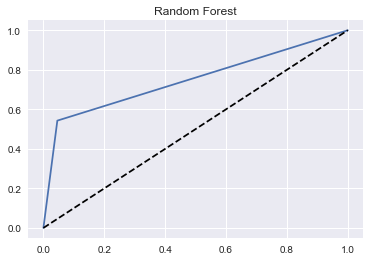

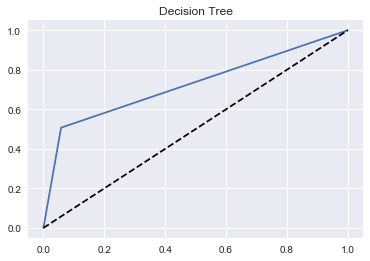

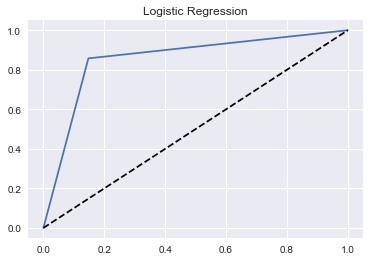

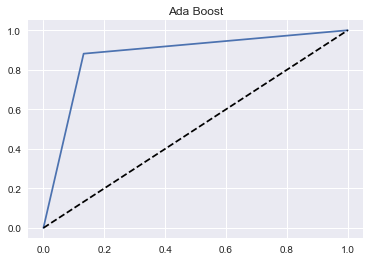

In [87]:
for model in models:
    print(model[1])
    plt.figure()
    plt.title(model[1])
    evaluate_sample_method(RandomOverSampler, model[0])

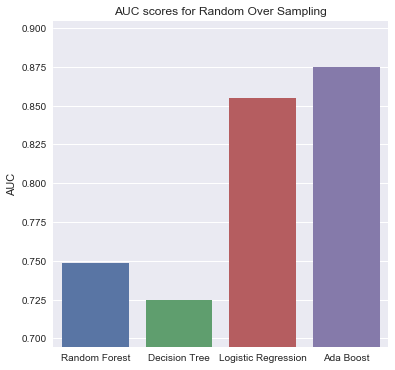

In [88]:
plot_aucs(model_names, aucs, 'Random Over Sampling')

In [89]:
clear_aucs()

# Random under-sampling

In [90]:
set_aucs()

Random Forest
                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      0.91      0.92      0.67      0.47      9116
          1       0.45      0.91      0.86      0.60      0.67      0.42      1181

avg / total       0.93      0.86      0.91      0.88      0.67      0.46     10297

[[7811 1305]
 [ 103 1078]]


0.884815441135


Decision Tree
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.84      0.85      0.90      0.62      0.41      9116
          1       0.40      0.85      0.84      0.54      0.62      0.37      1181

avg / total       0.91      0.84      0.84      0.86      0.62      0.41     10297

[[7617 1499]
 [ 182  999]]


0.840728577272


Logistic Regression
                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.84      0.86      0.91      0.64      0.43      9116
          1       0.42 

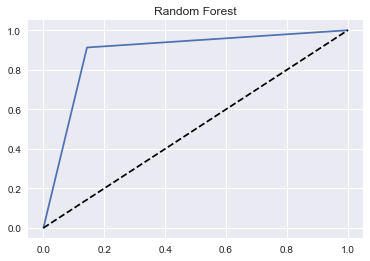

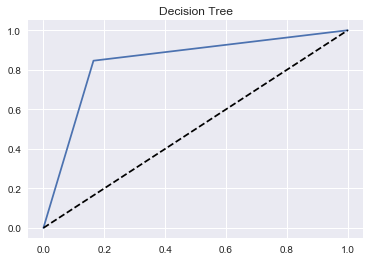

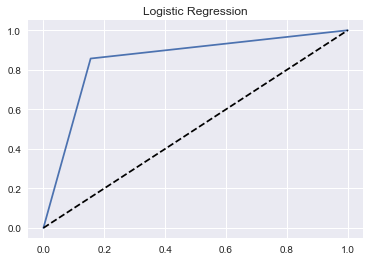

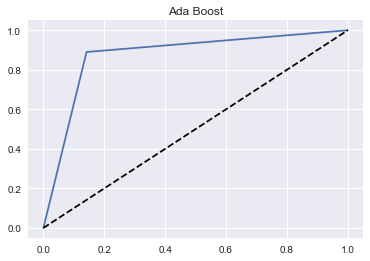

In [91]:
for model in models:
    print(model[1])
    plt.figure()
    plt.title(model[1])
    evaluate_sample_method(RandomUnderSampler, model[0])

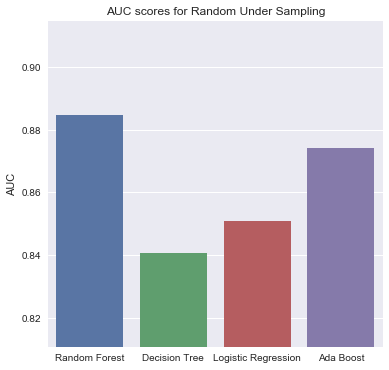

In [92]:
plot_aucs(model_names, aucs, 'Random Under Sampling')

In [93]:
clear_aucs()

## Near Miss Sampling

In [94]:
set_aucs()

Random Forest
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.47      0.81      0.63      0.40      0.17      9116
          1       0.17      0.81      0.47      0.28      0.40      0.15      1181

avg / total       0.86      0.51      0.77      0.59      0.40      0.17     10297

[[4290 4826]
 [ 222  959]]


0.641312424786


Decision Tree
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.45      0.81      0.61      0.39      0.16      9116
          1       0.16      0.81      0.45      0.27      0.39      0.14      1181

avg / total       0.86      0.49      0.77      0.57      0.39      0.16     10297

[[4108 5008]
 [ 228  953]]


0.628789756192


Logistic Regression
                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.84      0.77      0.90      0.61      0.39      9116
          1       0.38 

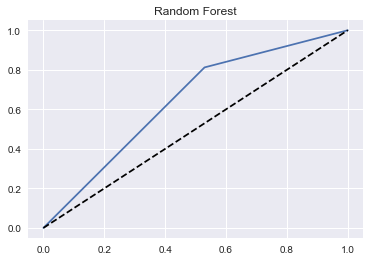

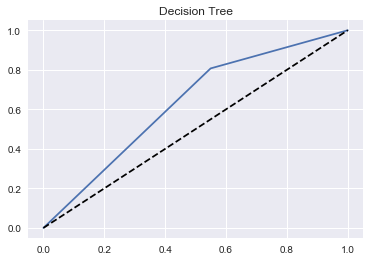

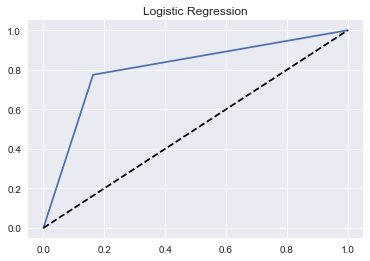

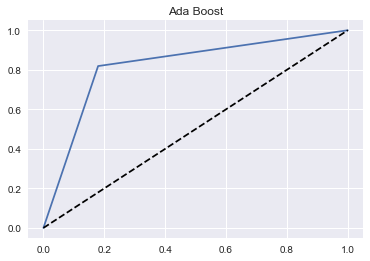

In [95]:
for model in models:
    print(model[1])
    plt.figure()
    plt.title(model[1])
    evaluate_sample_method(NearMiss, model[0])

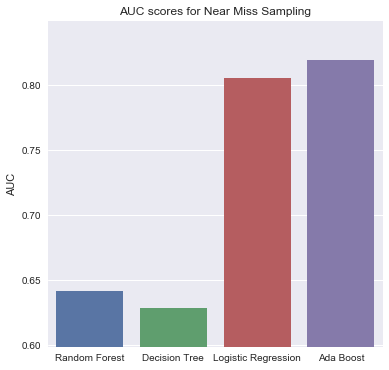

In [96]:
plot_aucs(model_names, aucs, 'Near Miss Sampling')

In [97]:
clear_aucs()

# Final Thoughts

The goal of the model is to segment future potential client lists into customers that are more likely to sign on for a term deposit from those who are not. 

The sampling models provide varying degrees usefulness.

The base Random Forest and Decision tree models perform the best, as they provide the most true positive values.

Although each base model struggles with misclassifying positive values as negative.

Near Miss sampling performed the worst amongst all of the models. Near Miss sampling resulted in a great deal of false positive classifications, recording the most type of this classification amongst all sampling models used.

Logistic Regression performed pretty uniformly across all sampling techniques, providing a large number of true positives and false positives. 

Randomly Under Sampled models consistently provided the largest number of true positive outcomes.

SMOTE models provided the most balance between false positive and false negative predictions.